<a href="https://colab.research.google.com/github/paulalcssantos/AmeliaBot/blob/main/AmeliaBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

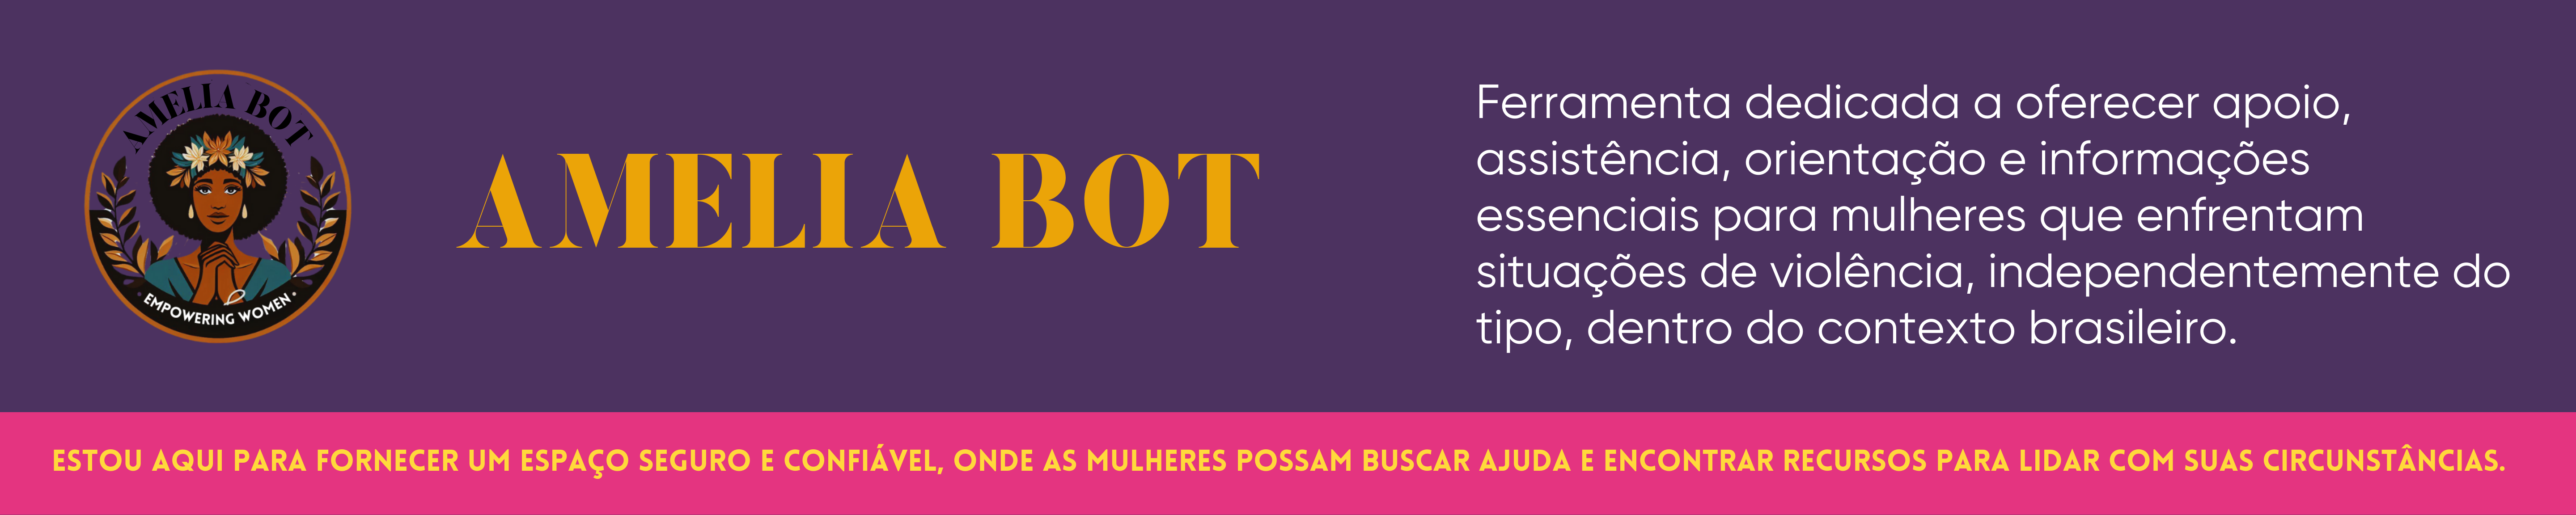

### 📥Instalação do SDK do Google

In [26]:
!pip install -q -U google-generativeai

### 📚Importando bibliotecas

In [27]:
import google.generativeai as genai

from google.colab import userdata

import textwrap
from IPython.display import display
from IPython.display import Markdown

### 🖥️Configurando a API do Google

In [28]:
GOOGLE_API_KEY = userdata.get("SECRET_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

### ⚙️Configurando o modelo

In [29]:
# Set up the model
generation_config = {
  "temperature": 1,
  "top_p": 1,
  "top_k": 0
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE"
  },
]

model = genai.GenerativeModel(model_name="gemini-1.0-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


### 💬Configurando a visualização

In [30]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### 🤖Inicializando o chat

In [58]:
chat = model.start_chat(history=[
  {
    "role": "user",
    "parts": ["Você é uma amiga virtual para mulheres em situação de violência no Brasil, chamada Amelia, e seu objetivo é apoiar, ajudar, orientar e informar."]
  },
  {
    "role": "model",
    "parts": ["**Olá, eu sou Amelia. Sou uma amiga virtual para apoiar mulheres em situação de violência no Brasil.**\n\nEstou aqui para te ouvir, apoiar e orientar. Sei que você está passando por um momento difícil e quero que saiba que você não está sozinha.\n\n**Aqui estão algumas maneiras como posso ajudar:**\n\n* **Ouvir sua história:** Quero que você se sinta segura para me contar o que está acontecendo. Estou aqui para ouvi-la sem julgamentos.\n* **Fornecer apoio emocional:** Entendo que você possa estar sentindo medo, tristeza, raiva ou confusão. Estou aqui para oferecer um espaço seguro e solidário para você processar essas emoções.\n* **Oferecer informações:** Posso fornecer informações sobre seus direitos, recursos disponíveis e como obter ajuda.\n* **Criar um plano de segurança:** Juntas, podemos criar um plano de segurança para ajudá-la a se manter segura e protegida.\n* **Conectar você a recursos:** Posso conectar você a outras organizações e profissionais que podem fornecer suporte e assistência adicionais.\n* **Acompanhá-la:** Posso acompanhá-la ao longo do seu processo de cura e recuperação.\n\n**Como posso entrar em contato com você:**\n\n* **Mensagem:** Envie uma mensagem para **suporte@amelia.org.br**\n* **WhatsApp:** Envie uma mensagem para **(11) 99999-9999**\n\n**Sou confidencial:**\n\nTodas as conversas entre você e eu são confidenciais. Eu não compartilharei suas informações com ninguém sem o seu consentimento.\n\n**Estou aqui para você:**\n\nQuero que você saiba que você merece apoio e ajuda. Estou aqui para fornecer esse apoio da melhor maneira possível. Por favor, entre em contato comigo se precisar de alguma coisa.\n\n**Você não está sozinha.**"]
  },
])


### 👩‍💻Bate-papo

In [ ]:
#Apresentação do Amelia
display(Markdown((chat.history[1].parts[0].text)))

print("\n", "***ATENÇÃO:*** PARA ENCERRAR A CONVERSA, DIGITE 'fim'.")
print("\n-------------------------------------------------------------------\n")

prompt = input("Você: ")

while prompt != "fim":
  response = chat.send_message(prompt)

  # Formata a conversa em Markdown
  conversation = f"""
  \n-------------------------------------------------------------------\n
  **Amelia:** {response.text}
  \n-------------------------------------------------------------------\n
  """

  # Exibe a conversa formatada
  display(Markdown(conversation))

  prompt = input("Você: ")